In [34]:
import pandas as pd
import math
import seaborn as sns
import numpy as np

In [35]:
movements = pd.read_csv("../data/data_movements_10.csv")
records = pd.read_csv("../data/data_trials_10.csv")

<Axes: xlabel='x', ylabel='y'>

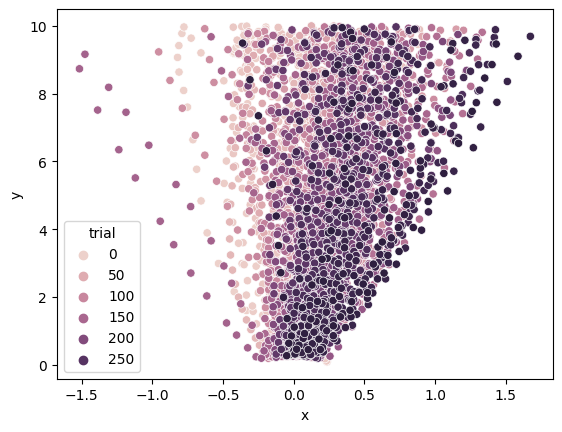

In [36]:
sns.scatterplot(data = movements.loc[movements.state == 'reach'], x = 'x', y = 'y', hue = 'trial')

In [37]:
movements

,Unnamed: 0,trial,state,sample,time,x,y
0,0,0,search_ring,0,0.008533,1.160125,2.861691
1,1,0,search_ring,1,0.016831,1.160131,2.861720
2,2,0,search_ring,2,0.033971,1.160141,2.861809
3,3,0,search_ring,3,0.050889,1.160126,2.861838
4,4,0,search_ring,4,0.066786,1.160148,2.861844
...,...,...,...,...,...,...,...
90778,253,299,iti,96487,1608.166202,1.783393,9.574320
90779,254,299,iti,96488,1608.183173,1.783843,9.165780
90780,255,299,iti,96489,1608.201185,1.783437,8.758247
90781,256,299,iti,96490,1608.216182,1.784046,8.355428


In [38]:
dist = lambda x1, y1, x2, y2: math.sqrt((y2 - y1)**2 + (x2 - x1)**2)

dx = [0]
dt = [0]
for i in range(1, len(movements)):
    prev_row = movements.iloc[i - 1]
    cur_row = movements.iloc[i]
    dx.append(dist(prev_row.x, prev_row.y, cur_row.x, cur_row.y))
    dt.append(cur_row.time - prev_row.time)

movements['dx'] = dx
movements['dt'] = dt

In [39]:
movements['vel'] = movements.dx / movements.dt

In [40]:
reach = movements.loc[movements.state == 'reach']
max_vel = reach[['trial', 'dx', 'dt', 'vel']].groupby('trial').agg({'vel': 'max'}).reset_index().rename(columns={'vel': 'max_vel'})

joined = pd.merge(reach, max_vel, on='trial', how='left')
mx_points = joined.loc[joined.vel == joined.max_vel]
first_points = reach.groupby('trial').agg(lambda x: list(x)[0]).reset_index()

In [41]:
mx_points

,Unnamed: 0,trial,state,sample,time,x,y,dx,dt,vel,max_vel
7,237,0,reach,237,3.950847,0.235166,4.380513,0.992721,0.017988,55.187644,55.187644
40,170,1,reach,558,9.299950,-0.686673,5.766012,0.933972,0.016017,58.311655,58.311655
55,93,2,reach,783,13.050108,0.526440,4.335724,0.909478,0.016110,56.453562,56.453562
70,127,3,reach,1041,17.352082,0.333029,6.857450,1.473205,0.018004,81.825185,81.825185
80,94,4,reach,1262,21.035179,-0.269615,4.041397,1.133215,0.018014,62.907443,62.907443
...,...,...,...,...,...,...,...,...,...,...,...
4282,208,295,reach,95359,1589.366012,0.313311,8.842661,1.099964,0.015003,73.316241,73.316241
4294,170,296,reach,95654,1594.283107,-0.309407,8.404864,1.063749,0.014993,70.947785,70.947785
4306,110,297,reach,95889,1598.200195,0.713220,8.622428,0.905456,0.014889,60.812523,60.812523
4318,94,298,reach,96108,1601.849255,0.412790,7.709969,0.962353,0.016025,60.054736,60.054736


In [42]:
first_points

,trial,Unnamed: 0,state,sample,time,x,y,dx,dt,vel
0,0,230,reach,230,3.834218,-0.035808,0.276042,0.164220,0.017280,9.503263
1,1,165,reach,553,9.218507,-0.334205,1.600344,0.768720,0.018899,40.674948
2,2,87,reach,777,12.951422,0.170239,0.332872,0.206508,0.016326,12.648701
3,3,120,reach,1034,17.235504,-0.005328,0.550846,0.365418,0.018238,20.036182
4,4,88,reach,1256,20.935576,-0.178896,0.299617,0.236636,0.018285,12.941691
...,...,...,...,...,...,...,...,...,...,...
295,295,196,reach,95347,1589.166403,0.008889,0.318098,0.176692,0.015165,11.651095
296,296,160,reach,95644,1594.116513,0.020567,0.458255,0.270694,0.017167,15.768299
297,297,100,reach,95879,1598.033645,0.331486,1.412853,0.385794,0.017666,21.838120
298,298,84,reach,96098,1601.684690,-0.049660,0.267927,0.253547,0.018167,13.956682


<Axes: xlabel='x', ylabel='y'>

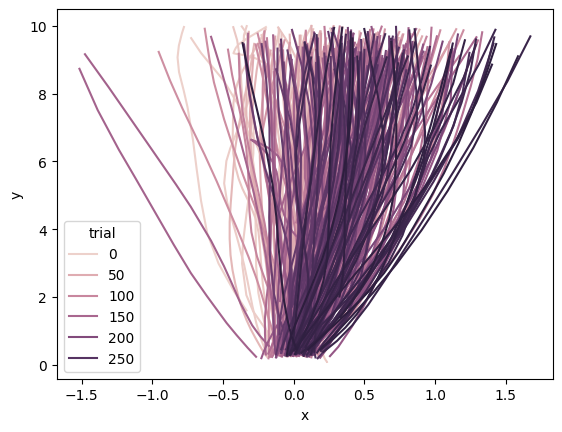

In [43]:
sns.lineplot(data = movements.loc[movements.state == 'reach'], x = 'x', y = 'y', hue = 'trial', sort = False)

In [44]:
movements = pd.read_csv('../data/data_movements_7.csv')
trials = pd.read_csv('../data/data_trials_7.csv')
trials['trial'] = trials.trial - 1

In [45]:
uncertainty_cols = ['no_uncertainty', 'low_uncertainty', 'high_uncertainty', 'unlimited_uncertainty']
def uncertainty_label(x):
    if all(x[col] == 0 for col in uncertainty_cols):
        return 'w/b'
    for col in uncertainty_cols:
        if x[col] == 1:
            return col

trials['uncertainty'] = trials.apply(uncertainty_label, axis=1)

<Axes: xlabel='x', ylabel='y'>

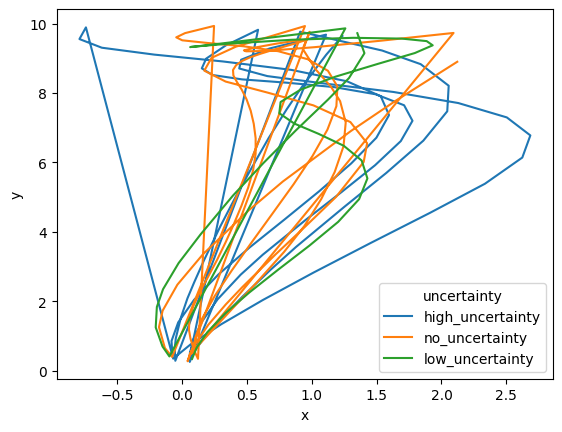

In [46]:
joined = pd.merge(movements, trials[['trial', 'uncertainty']], on='trial', how='left')

rand_trials = np.random.choice([i for i in range(110, 180)], 20)

# smpl = joined.loc[(joined.state == 'reach') & (joined.trial.isin(rand_trials))]

smpl = joined.loc[(joined.state == 'reach') & (joined.trial.isin(rand_trials) & (joined.uncertainty.isin(['low_uncertainty', 'high_uncertainty', 'no_uncertainty'])))]

sns.lineplot(data = smpl.loc[smpl.state == 'reach'], x = 'x', y = 'y', hue = 'uncertainty', sort = False)


Checking for correct recording of movements post changes to exp. run code

In [47]:
test = pd.read_csv('../data/data_movements_demo.csv')
test.loc[test.trial ==6]

,Unnamed: 0,trial,state,sample,time,x,y
3887,0,6,search_ring,3405,30.011593,0.000000,11.660156
3888,1,6,search_ring,3406,30.026200,-0.058594,11.308594
3889,2,6,search_ring,3407,30.043202,-0.117188,10.898438
3890,3,6,search_ring,3408,30.045732,-0.117188,10.898438
3891,4,6,search_ring,3409,30.059279,-0.175781,10.605469
...,...,...,...,...,...,...,...
13243,558,6,iti,4003,41.529329,2.226562,19.277344
13244,559,6,iti,4004,41.546515,2.226562,19.277344
13245,560,6,iti,4005,41.562294,2.226562,19.277344
13246,561,6,iti,4006,41.579430,2.226562,19.277344
